<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1>

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [213]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [84]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [85]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [86]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário realizar tratamento para esses casos.
 Em seguida, vamos visualizar os outliers.

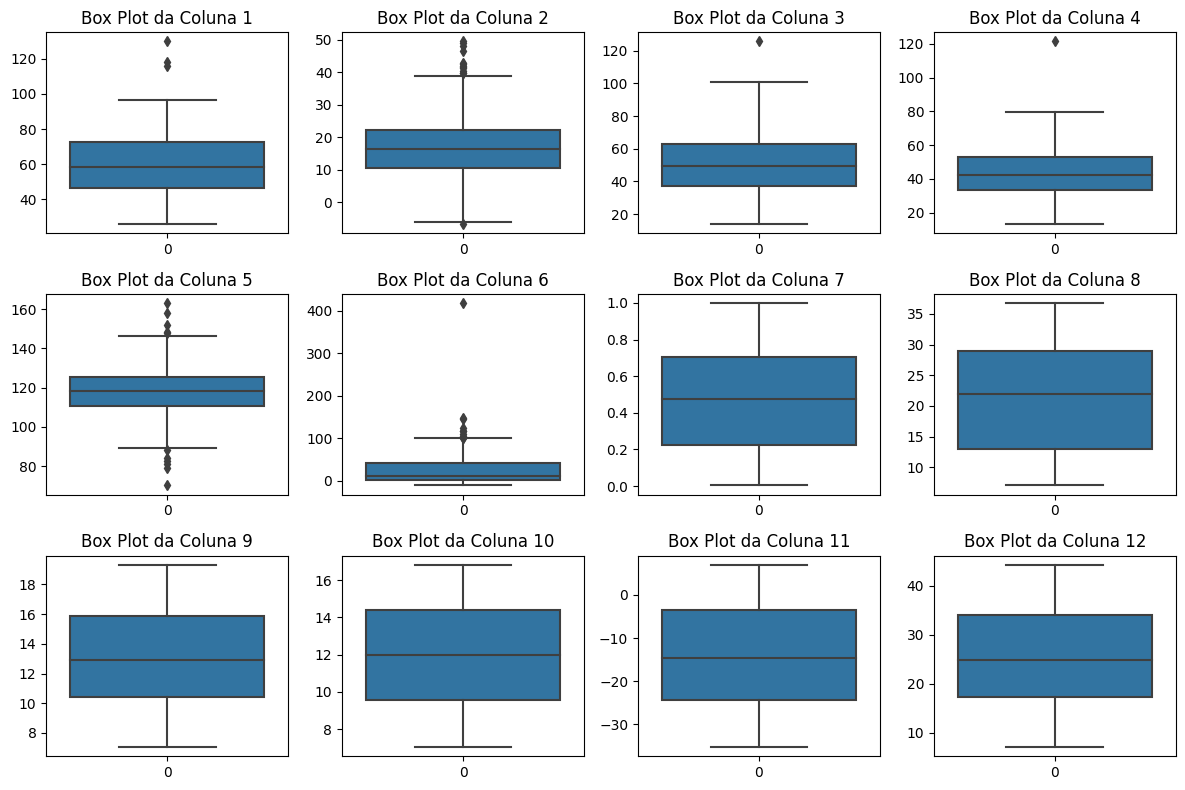

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()


# Primeiro Treino 💪

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [89]:
def evaluateModel(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print()
  print(f"score = {model.score(X_test, y_test):.2f}\n")
  print("classification report:")
  print(classification_report(y_test, y_pred))
  print("confusion matrix:")
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.show();

In [90]:
def plot_scores(labels, scores, str):
  normalized_scores = [(score - min(scores)) / (max(scores) - min(scores)) for score in scores]
  color_palette = sns.color_palette("cool", len(activation_funcs))

  sns.barplot(x=labels, y=scores, palette=color_palette)
  plt.xlabel(str)
  plt.ylabel("Score")
  plt.title(f"{str} X Score")
  plt.ylim(min(scores) - 0.05, min(max(scores) + 0.05, 1))
  plt.xticks(rotation=45)
  plt.show()

In [91]:
model = MLPClassifier(verbose=True, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [92]:
model.fit(X_train, y_train);

Iteration 1, loss = 8.83975992
Iteration 2, loss = 4.38450822
Iteration 3, loss = 1.56396573
Iteration 4, loss = 1.38818416
Iteration 5, loss = 2.08664603
Iteration 6, loss = 2.36014838
Iteration 7, loss = 2.20556447
Iteration 8, loss = 1.76020775
Iteration 9, loss = 1.26138644
Iteration 10, loss = 0.89506850
Iteration 11, loss = 0.86885987
Iteration 12, loss = 1.03712192
Iteration 13, loss = 1.14691070
Iteration 14, loss = 1.06321017
Iteration 15, loss = 0.88211266
Iteration 16, loss = 0.74778332
Iteration 17, loss = 0.72793526
Iteration 18, loss = 0.75909171
Iteration 19, loss = 0.78670973
Iteration 20, loss = 0.76693524
Iteration 21, loss = 0.69623432
Iteration 22, loss = 0.64040940
Iteration 23, loss = 0.63908392
Iteration 24, loss = 0.66096255
Iteration 25, loss = 0.66859654
Iteration 26, loss = 0.64873007
Iteration 27, loss = 0.61348615
Iteration 28, loss = 0.58842477
Iteration 29, loss = 0.57427613
Iteration 30, loss = 0.57838678
Iteration 31, loss = 0.57375548
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62

confusion matrix:


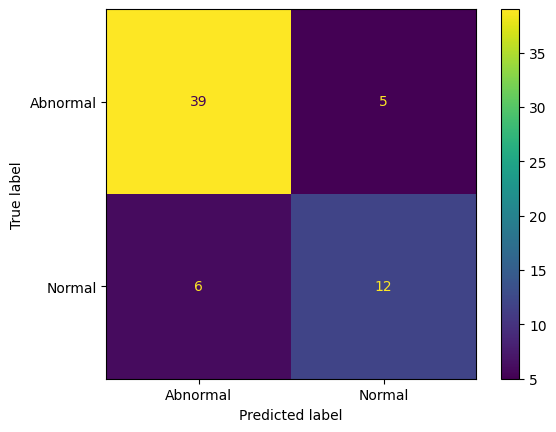

In [93]:
evaluateModel(model, X_test, y_test)

In [94]:
y_train.value_counts()

Abnormal    166
Normal       82
Name: Class_att, dtype: int64

Como é possível perceber pelo <i>classification report</i>, temos uma facilidade maior do modelo em classificar corretamente a classe de <i>'abnormal'</i> (sobretudo olhando a métrica de precisão). De fato, ao observar o a distribuição dos valores no dataset de treino, é possível reparar que temos mais ocorrências dessa classe, do que da classe 'normal'. É necessário, então, fazer o balanceamento das classes no dataset de treino

# Balanceamento de classes no dataset de treino

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [96]:
y_train_resampled.value_counts()

Abnormal    166
Normal      166
Name: Class_att, dtype: int64

In [97]:
model = MLPClassifier(verbose=False, max_iter=200, random_state=42)
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [98]:
model.fit(X_train_resampled, y_train_resampled);

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.87      0.89      0.88        44
      Normal       0.71      0.67      0.69        18

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.78        62
weighted avg       0.82      0.82      0.82        62

confusion matrix:


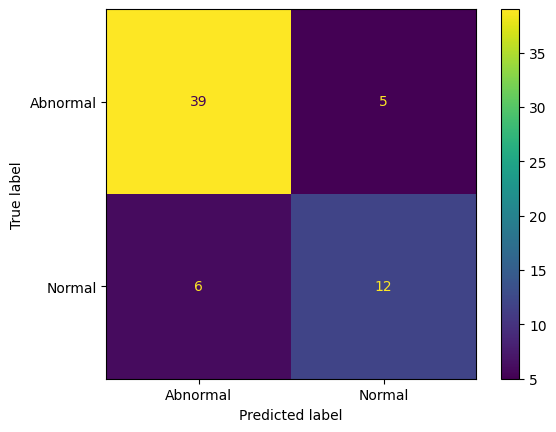

In [99]:
evaluateModel(model, X_test, y_test)

In [100]:
#WIP: removing outliers
from scipy import stats
outliers_removed = df[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
outliers_removed.shape

(298, 13)

In [101]:
y = outliers_removed['Class_att']
X = outliers_removed.drop(['Class_att'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)
model = MLPClassifier(verbose=False, max_iter=200, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Pode ajustar a estratégia de amostragem conforme necessário
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [102]:
model.fit(X_train_resampled, y_train_resampled);

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.87      0.91        46
      Normal       0.67      0.86      0.75        14

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.89      0.87      0.87        60

confusion matrix:


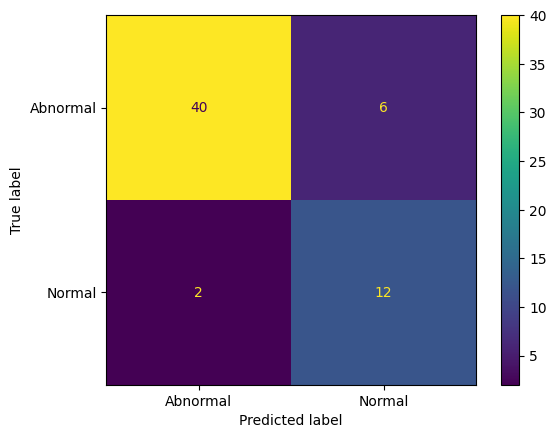

In [103]:
evaluateModel(model, X_test, y_test)

In [104]:
X_train, y_train = X_train_resampled, y_train_resampled

#Mudando as funções de ativação

In [105]:
activation_funcs = ['relu', 'tanh', 'logistic', 'identity']
scores = []

for activation_func in activation_funcs:
  model = MLPClassifier(verbose=False, random_state=42, activation=activation_func, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


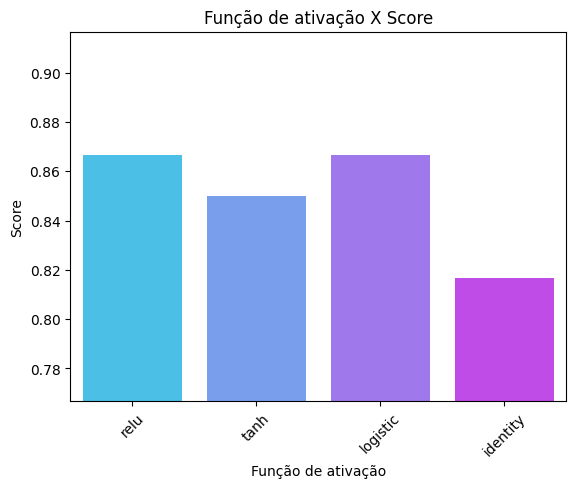

In [106]:
plot_scores(activation_funcs, scores, "Função de ativação")

###tanh -> the hyperbolic tan function, returns f(x) = tanh(x)

In [107]:
model = MLPClassifier(verbose=False, random_state=42, activation='tanh', max_iter=1000)
model.fit(X_train, y_train);


score = 0.85

classification report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.85      0.90        46
      Normal       0.63      0.86      0.73        14

    accuracy                           0.85        60
   macro avg       0.79      0.85      0.81        60
weighted avg       0.88      0.85      0.86        60

confusion matrix:


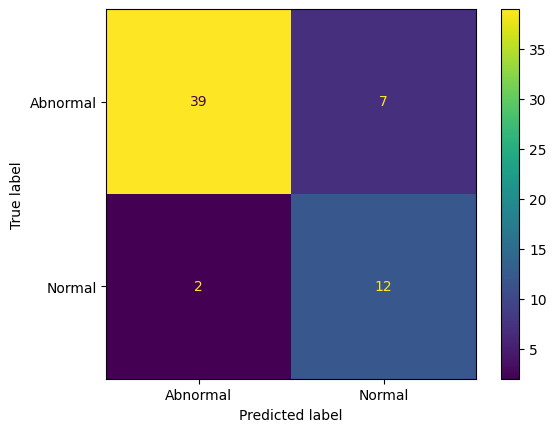

In [108]:
evaluateModel(model, X_test, y_test)

###logistic -> the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

In [111]:
model = MLPClassifier(verbose=False, random_state=42, activation='logistic', max_iter=1000)
model.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.93      0.89      0.91        46
      Normal       0.69      0.79      0.73        14

    accuracy                           0.87        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.87      0.87      0.87        60

confusion matrix:


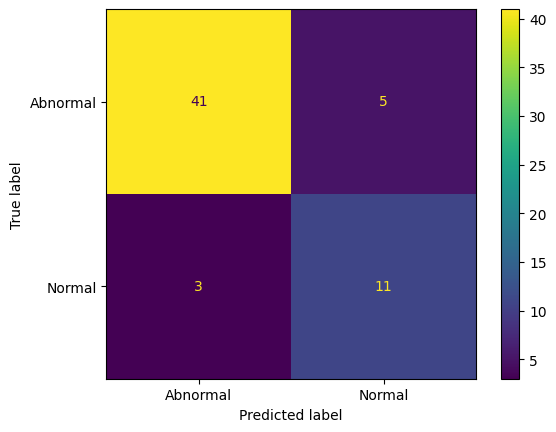

In [112]:
evaluateModel(model, X_test, y_test)

###identity -> no-op activation, useful to implement linear bottleneck, returns f(x) = x

In [113]:
model = MLPClassifier(verbose=False, random_state=42, activation='identity', max_iter=1000)
model.fit(X_train, y_train);


score = 0.82

classification report:
              precision    recall  f1-score   support

    Abnormal       0.93      0.83      0.87        46
      Normal       0.58      0.79      0.67        14

    accuracy                           0.82        60
   macro avg       0.75      0.81      0.77        60
weighted avg       0.85      0.82      0.83        60

confusion matrix:


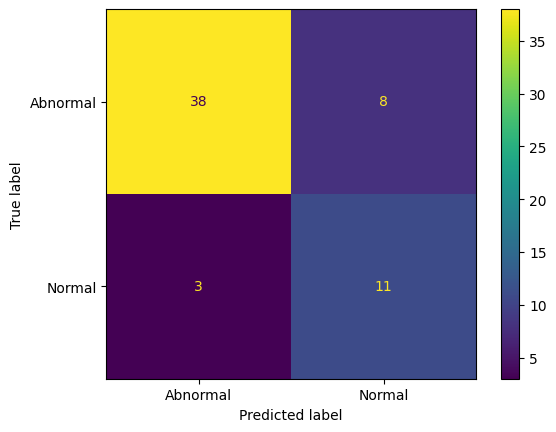

In [114]:
evaluateModel(model, X_test, y_test)

#Trocando os solvers

In [115]:
solvers = ['lbfgs', 'adam', 'sgd']
scores = []

for solver in solvers:
  model = MLPClassifier(verbose=False, random_state=42, solver=solver, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

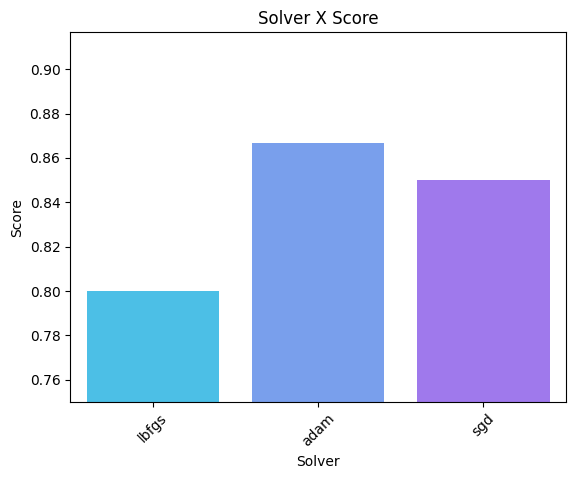

In [116]:
plot_scores(solvers, scores, "Solver")

In [208]:
model = MLPClassifier(verbose=False, random_state=42, solver='adam', max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.97      0.85      0.91        46
      Normal       0.65      0.93      0.76        14

    accuracy                           0.87        60
   macro avg       0.81      0.89      0.84        60
weighted avg       0.90      0.87      0.87        60

confusion matrix:


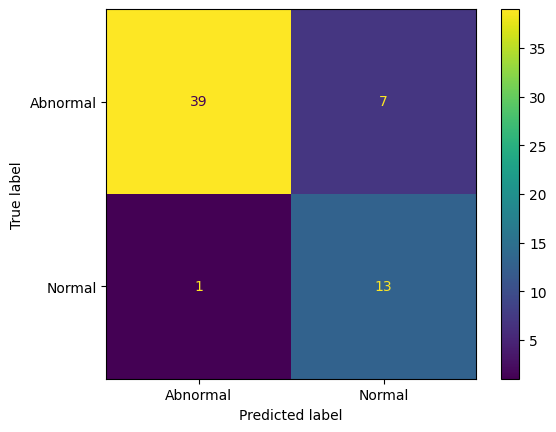

In [209]:
evaluateModel(model, X_test, y_test)

#Trocando learning rate

In [206]:
learning_rates = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
labels = ["1", "0.1", "0.01", "0.001", "0.0001", "0.00001", "0.000001"]
scores = []

for learning_rate in learning_rates:
  model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=learning_rate, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


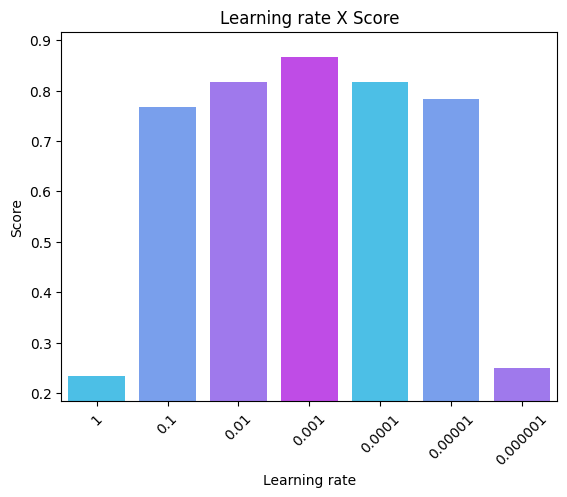

In [207]:
plot_scores(labels, scores, "Learning rate")

In [211]:
model = MLPClassifier(verbose=False, random_state=42, learning_rate_init=1e-3, max_iter=1000)
model.fit(X_train, y_train);


score = 0.87

classification report:
              precision    recall  f1-score   support

    Abnormal       0.97      0.85      0.91        46
      Normal       0.65      0.93      0.76        14

    accuracy                           0.87        60
   macro avg       0.81      0.89      0.84        60
weighted avg       0.90      0.87      0.87        60

confusion matrix:


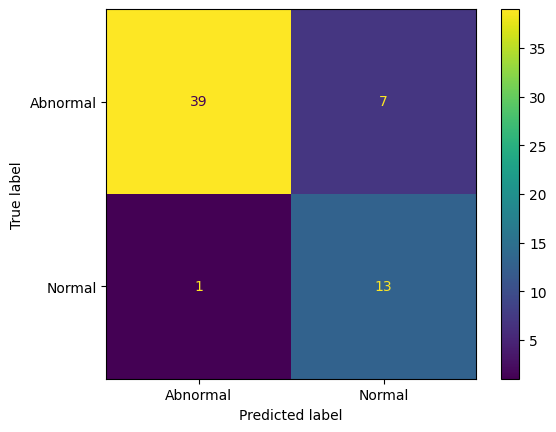

In [212]:
evaluateModel(model, X_test, y_test)

#Mudando hidden layers

In [214]:
hidden_layers_sizes = [(100, 100, 100), (512, 512, 512), (1024, 1024, 1024), (100, 100, 100, 100, 100), (512, 512, 512, 512, 512), (1024, 1024, 1024, 1024, 1024), (2048, 2048, 2048), (1024, 512, 128, 512, 1024), (16, 32, 64, 128, 256), (256, 64, 32, 16)]
labels = ["3x100", "3x512", "3x1024", "5x100", "5x512", "5x1024", "3x2048", "down-up", "up", "down"]
scores = []

for hidden_layer_sizes in tqdm(hidden_layers_sizes):
  model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)
  model.fit(X_train, y_train)
  scores.append(model.score(X_test, y_test))

100%|██████████| 10/10 [02:45<00:00, 16.55s/it]


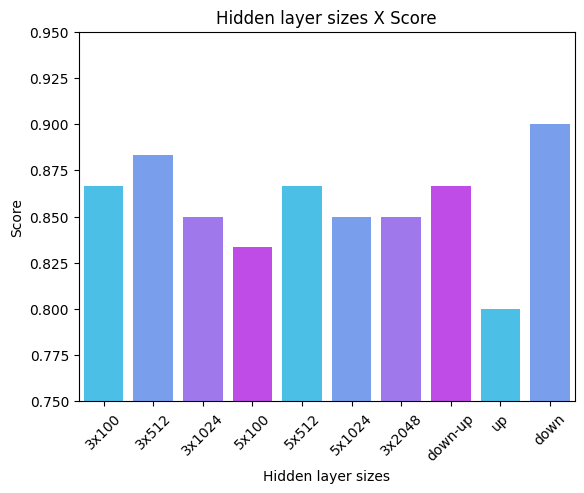

In [215]:
plot_scores(labels, scores, "Hidden layer sizes")

In [218]:
model = MLPClassifier(verbose=False, random_state=42, hidden_layer_sizes = (256, 64, 32, 16), max_iter=1000)
model.fit(X_train, y_train);


score = 0.90

classification report:
              precision    recall  f1-score   support

    Abnormal       0.95      0.91      0.93        46
      Normal       0.75      0.86      0.80        14

    accuracy                           0.90        60
   macro avg       0.85      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60

confusion matrix:


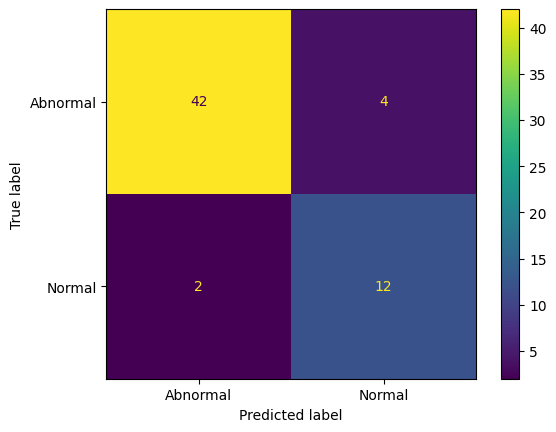

In [219]:
evaluateModel(model, X_test, y_test)